# Question 2

A propriedade de ordenação topológica do algoritmo SOM pode ser usada para formar uma representação bidimensional abstrata para fins de visualização de um espaço de entrada de alta dimensionalidade. O objetivo é visualizar os dados de dimensão 8 em um espaço de dimensão 2, constituído pela grade de neurônios. Para investigar esta forma de representação, considere uma grade bidimensional de neurônios que é treinada tendo como entrada os dados oriundos de quatro distribuições gaussianas, C1, C2, C3, e C4, em um espaço de entrada de dimensionalidade igual a oito, isto é $x = (x_1, x_2, ..., x_8)^t$ . Todas as nuvens têm variâncias unitária, mas centros ou vetores média diferentes dados por $m_1 = (0,0,0,0,0,0,0,0)^t$, $m_2 = (0,0,0,0,0,0,0,0)^t$, $m_3 = (0,0,0,0,0,0,0,0)^t$, $m_4 = (0,0,0,0,0,0,0,0)^t$. Calcule o mapa produzido pelo algoritmo SOM, e verifique como as distribuições dos dados estão representadas. 

Authors: 
  - [Morsinaldo de Azevedo Medeiros](https://github.com/Morsinaldo)
  - [Thaís de Araújo de Medeiros](https://github.com/thaisaraujo2000)

In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
from minisom import MiniSom
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import RegularPolygon
from matplotlib import pyplot as plt
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

In [ ]:
# data
m1 = np.zeros(8)
m2 = np.array([4,0,0,0,0,0,0,0])
m3 = np.array([0,0,0,4,0,0,0,0])
m4 = np.array([0,0,0,0,0,0,0,4])

In [ ]:
# center
centers = np.array([m1, m2, m3, m4])
centers

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 4.]])

In [ ]:
# Gera um conjunto de dados com 1000 amostras distribuídas em centros específicos, com 8 características
data, y = make_blobs(n_samples=1000, centers=centers, n_features=8) 

In [ ]:
# as primeiras cinco amostras do conjunto de dados
np.set_printoptions(precision=3)
print('Amostra do conjunto de dados\n\n', data[:5])

Amostra do conjunto de dados

 [[ 0.899  0.498 -0.042  4.387  0.244  1.494 -0.433  0.935]
 [-0.361  2.219 -0.968  3.787 -0.198  0.011 -0.254 -0.295]
 [-1.122 -0.641 -1.441  3.26   1.315  0.93  -0.562  0.967]
 [ 0.368 -0.748  0.22  -0.382 -1.949 -1.657 -1.506  3.644]
 [-1.403 -0.256  1.944  0.444  1.203  0.086  0.345 -0.439]]


In [ ]:
som = MiniSom(
    10, 10, 8,  # Dimensões da grade do SOM: 10x10, com vetores de entrada de tamanho 8
    sigma=1.5, learning_rate=.7,  # Parâmetros de controle do treinamento
    activation_distance='euclidean',  # Distância euclidiana como métrica de ativação
    topology='hexagonal',  # Topologia hexagonal para a grade do SOM
    neighborhood_function='gaussian'  # Função de vizinhança gaussiana
)

som.train(data, 100, verbose=True)  # Treina o SOM com 100 iterações, exibindo informações de progresso

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 2.247823089947658


In [ ]:
xx, yy = som.get_euclidean_coordinates()  # Obtém as coordenadas euclidianas dos neurônios da grade SOM
umatrix = som.distance_map()  # Calcula o mapa de distâncias (U-Matrix) para visualização do SOM
weights = som.get_weights()  # Obtém os pesos sinápticos dos neurônios da grade SOM

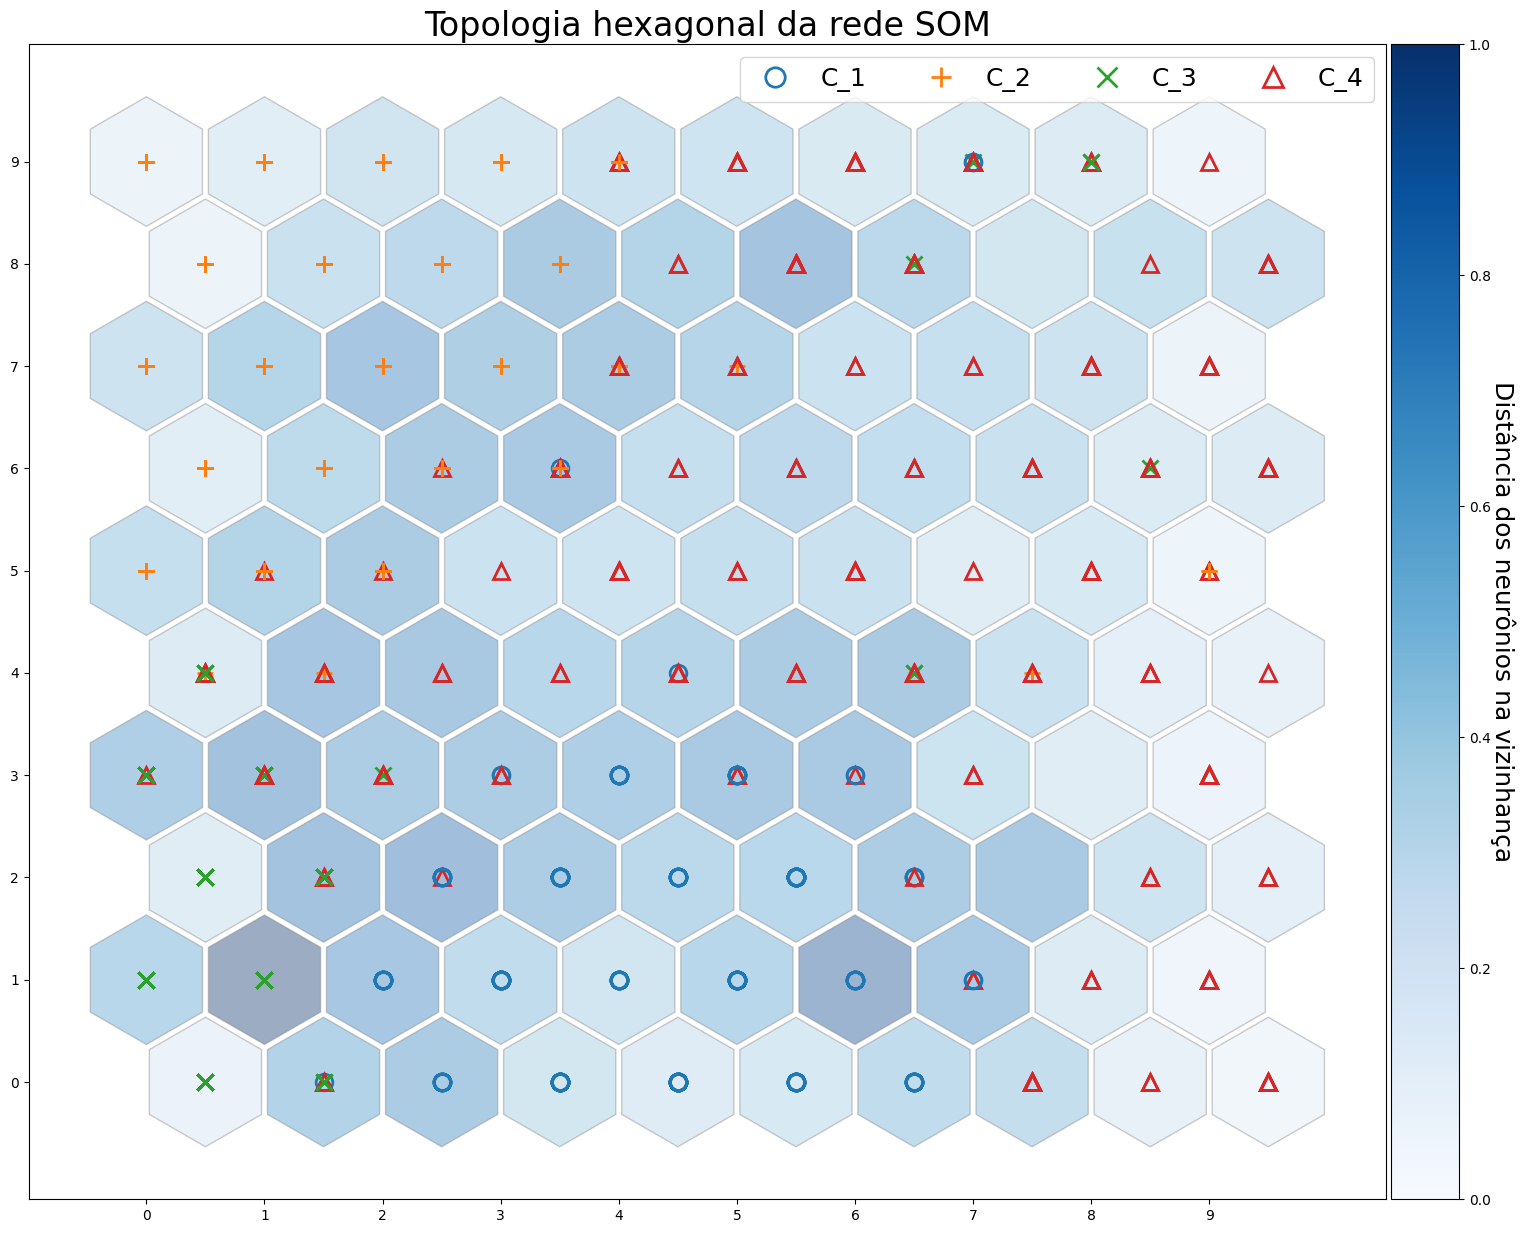

In [ ]:
f = plt.figure(figsize=(22, 15))  # Cria uma figura para a visualização do SOM com tamanho personalizado
ax = f.add_subplot(111)  # Adiciona um subplot à figura

ax.set_aspect('equal')  # Define a proporção de aspecto igual para garantir a exibição correta dos hexágonos

# Iterativamente adiciona hexágonos à grade do SOM
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        # Calcula as coordenadas dos vértices de um hexágono na posição (i, j) da grade
        wy = yy[(i, j)] * 2 / np.sqrt(3) * 3 / 4
        hex = RegularPolygon(
            (xx[(i, j)], wy),  # Centro do hexágono
            numVertices=6,  # Número de vértices do hexágono
            radius=.95 / np.sqrt(3),  # Raio do hexágono
            facecolor=cm.Blues(umatrix[i, j]),  # Cor de preenchimento com base no mapa de distâncias
            alpha=.4,  # Transparência do hexágono
            edgecolor='gray'  # Cor da borda do hexágono
        )
        ax.add_patch(hex)  # Adiciona o hexágono ao subplot

markers = ['o', '+', 'x', '^']  # Marcadores para cada classe
colors = ['C0', 'C1', 'C2', 'C3']  # Cores para cada classe
for cnt, x in enumerate(data):
    # Obtém o neurônio vencedor para o vetor de entrada x
    w = som.winner(x)
    # Converte as coordenadas do neurônio vencedor para o sistema euclidiano
    wx, wy = som.convert_map_to_euclidean(w)
    wy = wy * 2 / np.sqrt(3) * 3 / 4  # Ajusta as coordenadas y no sistema euclidiano
    # Plota um marcador na posição do neurônio vencedor para o vetor de entrada x
    plt.plot(
        wx, wy,
        markers[y[cnt] - 1],  # Seleciona o marcador com base na classe verdadeira y
        markerfacecolor='None',
        markeredgecolor=colors[y[cnt] - 1],  # Seleciona a cor do marcador com base na classe verdadeira y
        markersize=12,
        markeredgewidth=2
    )

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange - .5, xrange)  # Define os rótulos do eixo x
plt.yticks(yrange * 2 / np.sqrt(3) * 3 / 4, yrange)  # Define os rótulos do eixo y

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 18
cb1.ax.set_ylabel('Distância dos neurônios na vizinhança', rotation=270, fontsize=18)
plt.gcf().add_axes(ax_cb)

legend_elements = [
    Line2D([0], [0], marker='o', color='C0', label='C_1', markerfacecolor='w', markersize=14, linestyle='None',
           markeredgewidth=2),
    Line2D([0], [0], marker='+', color='C1', label='C_2', markerfacecolor='w', markersize=14, linestyle='None',
           markeredgewidth=2),
    Line2D([0], [0], marker='x', color='C2', label='C_3', markerfacecolor='w', markersize=14, linestyle='None',
           markeredgewidth=2),
    Line2D([0], [0], marker='^', color='C3', label='C_4', markerfacecolor='w', markersize=14, linestyle='None',
           markeredgewidth=2)
]

ax.set_title('Topologia hexagonal da rede SOM', fontsize=24)
ax.legend(handles=legend_elements, loc='upper right', ncol=4, fontsize=18)  # Adiciona a legenda ao subplot

#plt.tight_layout()  # Ajusta o espaçamento dos subplots
plt.show()  # Exibe a figura
